In [1]:
import bs4 as bs
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
#import edgar
import time
import numpy as np
from textblob import TextBlob
import pandas as pd
import seaborn as sns
from collections import Counter
from readability import Readability

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import time
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing import sequence, text
from keras.layers import Input, Embedding

from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

import datetime as dt
import pandas as pd
import numpy as np
import warnings
import string
import spacy
nlp = spacy.load("en_core_web_sm")

import warnings
warnings.filterwarnings('ignore')

headers = {'User-Agent': "wouter@vanzeijl.nl"}

In [2]:
abbott_stock = pd.read_csv("datasets/abbott dataset.csv")
accenture_stock = pd.read_csv("datasets/accenture dataset.csv")
adobe_stock = pd.read_csv("datasets/adobe dataset.csv")
alphabet_stock = pd.read_csv("datasets/alphabet dataset.csv")
amazon_stock = pd.read_csv("datasets/amazon dataset.csv")
amd_stock = pd.read_csv("datasets/amd dataset.csv")
amgen_stock = pd.read_csv("datasets/amgen dataset.csv")
analog_stock = pd.read_csv("datasets/analog dataset.csv")
apple_stock = pd.read_csv("datasets/apple dataset.csv")
att_stock = pd.read_csv("datasets/att dataset.csv")
boeing_stock = pd.read_csv("datasets/boeing dataset.csv")
booking_stock = pd.read_csv("datasets/booking dataset.csv")
broadcom_stock = pd.read_csv("datasets/broadcom dataset.csv")
caterpillar_stock = pd.read_csv("datasets/caterpillar dataset.csv")
chevron_stock = pd.read_csv("datasets/chevron dataset.csv")
cisco_stock = pd.read_csv("datasets/cisco dataset.csv")
cola_stock = pd.read_csv("datasets/cola dataset.csv")
deere_stock = pd.read_csv("datasets/deere dataset.csv")
disney_stock = pd.read_csv("datasets/disney dataset.csv")
electric_stock = pd.read_csv("datasets/electric dataset.csv")
elevance_stock = pd.read_csv("datasets/elevance dataset.csv")
exxon_stock = pd.read_csv("datasets/exxon dataset.csv")
home_stock = pd.read_csv("datasets/home dataset.csv")
honeywell_stock = pd.read_csv("datasets/honeywell dataset.csv")
ibm_stock = pd.read_csv("datasets/ibm dataset.csv")
intel_stock = pd.read_csv("datasets/intel dataset.csv")
lockhead_stock = pd.read_csv("datasets/lockhead dataset.csv")
materials_stock = pd.read_csv("datasets/materials dataset.csv")
mcdonalds_stock = pd.read_csv("datasets/mcdonalds dataset.csv")
medtronic_stock = pd.read_csv("datasets/medtronic dataset.csv")
meta_stock = pd.read_csv("datasets/meta dataset.csv")
microsoft_stock = pd.read_csv("datasets/microsoft dataset.csv")
nike_stock = pd.read_csv("datasets/nike dataset.csv")
nvidia_stock = pd.read_csv("datasets/nvidia dataset.csv")
oracle_stock = pd.read_csv("datasets/oracle dataset.csv")
pfizer_stock = pd.read_csv("datasets/pfizer dataset.csv")
philips_stock = pd.read_csv("datasets/philips dataset.csv")
prologis_stock = pd.read_csv("datasets/prologis dataset.csv")
salesforce_stock = pd.read_csv("datasets/salesforce dataset.csv")
service_stock = pd.read_csv("datasets/service dataset.csv")
starbucks_stock = pd.read_csv("datasets/starbucks dataset.csv")
stryker_stock = pd.read_csv("datasets/stryker dataset.csv")
tesla_stock = pd.read_csv("datasets/tesla dataset.csv")
thermo_stock = pd.read_csv("datasets/thermo dataset.csv")
union_stock = pd.read_csv("datasets/union dataset.csv")
united_stock = pd.read_csv("datasets/united health dataset.csv")
ups_stock = pd.read_csv("datasets/ups dataset.csv")
verizon_stock = pd.read_csv("datasets/verizon dataset.csv")
visa_stock = pd.read_csv("datasets/visa dataset.csv")
wallmart_stock = pd.read_csv("datasets/wallmart dataset.csv")

In [3]:
frames = [abbott_stock, accenture_stock, adobe_stock, alphabet_stock, amazon_stock, amd_stock, amgen_stock, analog_stock,
          apple_stock, att_stock, boeing_stock, booking_stock,  broadcom_stock, caterpillar_stock, chevron_stock, 
          cisco_stock, cola_stock, deere_stock, disney_stock, electric_stock, elevance_stock, exxon_stock, home_stock, 
          honeywell_stock, ibm_stock, intel_stock, lockhead_stock, materials_stock, mcdonalds_stock, meta_stock, medtronic_stock, 
          microsoft_stock, nike_stock, nvidia_stock, oracle_stock, pfizer_stock, philips_stock, prologis_stock, salesforce_stock, 
          service_stock, starbucks_stock, stryker_stock, tesla_stock, thermo_stock, union_stock,
          united_stock, ups_stock, verizon_stock, visa_stock, wallmart_stock]


In [4]:
frames_names = ['abbott', 'accenture', 'adobe', 'alphabet', 'amazon', 'amd', 'amgen', 'analog',
          'apple', 'att', 'boeing', 'booking',  'broadcom', 'caterpillar', 'chevron', 
          'cisco', 'cola', 'deere', 'disney', 'electric', 'elevance', 'exxon', 'home', 
          'honeywell', 'ibm', 'intel', 'lockhead', 'materials', 'mcdonalds', 'meta', 'medtronic', 
          'microsoft', 'nike', 'nvidia', 'oracle', 'pfize', 'philips', 'prologis', 'salesforce', 
          'service', 'starbucks', 'stryker', 'tesla', 'thermo', 'union',
          'united', 'ups', 'verizon', 'visa', 'wallmart']

In [5]:
count = 0
for i in frames:
    i.insert(loc=0, column='Company', value=frames_names[count])
    count += 1

In [6]:
for company_df in frames:
    company_df['Price change'] = np.nan
    for i in range(0, len(company_df['Adj Close'])):
        try:
            if isinstance(company_df['press release'].iloc[i], str):
                for j in range(0,12):
                    change = company_df['Adj Close'].iloc[i+j] - company_df['Adj Close'].iloc[i]
                    company_df['Price change'].iloc[i+j] = change
        except:
            continue

In [7]:
for company_df in frames:
    company_df['Price change pct'] = np.nan
    for i in range(0, len(company_df['Adj Close'])):
        try:
            if isinstance(company_df['press release'].iloc[i], str):
                for j in range(0,12):
                    pct_change = (company_df['Adj Close'].iloc[i+j] - company_df['Adj Close'].iloc[i]) / company_df['Adj Close'].iloc[i] * 100
                    company_df['Price change pct'].iloc[i+j] = pct_change
        except:
            continue

In [8]:
result = pd.concat(frames)

#result.dropna(subset=['press release'], inplace=True)

In [9]:
result

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change,Price change pct
0,abbott,2015-01-01,38.122101,116055300,NaN,NaN,NaN,NaN,NaN,NaN
1,abbott,2015-02-01,40.558586,112821400,NaN,NaN,NaN,NaN,NaN,NaN
2,abbott,2015-03-01,39.668137,113588200,NaN,NaN,NaN,NaN,NaN,NaN
3,abbott,2015-04-01,39.745201,98185000,NaN,NaN,NaN,NaN,NaN,NaN
4,abbott,2015-05-01,41.824631,89226800,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
96,wallmart,2023-01-01,142.740509,108018200,NaN,NaN,NaN,NaN,10.716949,8.117452
97,wallmart,2023-02-01,141.014160,122851100,NaN,NaN,NaN,NaN,NaN,NaN
98,wallmart,2023-03-01,146.292404,174882900,NaN,NaN,NaN,NaN,NaN,NaN
99,wallmart,2023-04-01,150.398682,100629300,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [11]:
compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in range(0, len(result['press release'])):
    if isinstance(result['press release'].iloc[i], str):
        SIA = getSIA(result['press release'].iloc[i])
        compound.append(SIA['compound'])
        neg.append(SIA['neg'])
        neu.append(SIA['neu'])
        pos.append(SIA['pos'])
    else:
        compound.append(np.nan)
        neg.append(np.nan)
        neu.append(np.nan)
        pos.append(np.nan)

In [12]:
result['Compound'] = compound
result['Negative'] = neg
result['Neutral'] = neu
result['Positive'] = pos

In [13]:
result.tail(30)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change,Price change pct,Compound,Negative,Neutral,Positive
71,wallmart,2020-12-01,138.096039,170368500,NaN,NaN,NaN,NaN,36.261215,35.607873,NaN,NaN,NaN,NaN
72,wallmart,2021-01-01,135.081757,150162900,NaN,NaN,NaN,NaN,33.246933,32.647901,NaN,NaN,NaN,NaN
73,wallmart,2021-02-01,124.918640,184999800,We completed a strong year and a strong Q4 tha...,-11.647019,-20.448700,-11.773529,0.000000,0.000000,0.9887,0.009,0.810,0.182
74,wallmart,2021-03-01,130.601135,246548100,NaN,NaN,NaN,NaN,5.682495,4.548957,NaN,NaN,NaN,NaN
75,wallmart,2021-04-01,135.085739,153121900,NaN,NaN,NaN,NaN,10.167099,8.138977,NaN,NaN,NaN,NaN
76,wallmart,2021-05-01,137.132645,174777800,NaN,NaN,NaN,NaN,12.214005,9.777568,NaN,NaN,NaN,NaN
77,wallmart,2021-06-01,136.692169,169107000,NaN,NaN,NaN,NaN,11.773529,9.424958,NaN,NaN,NaN,NaN
78,wallmart,2021-07-01,138.175217,131883100,NaN,NaN,NaN,NaN,13.256577,10.612169,NaN,NaN,NaN,NaN
79,wallmart,2021-08-01,143.554901,181399800,NaN,NaN,NaN,NaN,18.636261,14.918719,NaN,NaN,NaN,NaN
80,wallmart,2021-09-01,135.599686,151255200,NaN,NaN,NaN,NaN,10.681046,8.550402,NaN,NaN,NaN,NaN


In [14]:
result['polarity'] = np.nan
result['subjectivity'] = np.nan

for i in range(0, len(result['press release'])):
    if isinstance(result['press release'].iloc[i], str):
        senti = TextBlob(result['press release'].iloc[i]).sentiment.polarity
        subj = TextBlob(result['press release'].iloc[i]).sentiment.subjectivity
        result['polarity'].iloc[i] = senti
        result['subjectivity'].iloc[i] = subj

In [15]:
result.tail(30)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change,Price change pct,Compound,Negative,Neutral,Positive,polarity,subjectivity
71,wallmart,2020-12-01,138.096039,170368500,NaN,NaN,NaN,NaN,36.261215,35.607873,NaN,NaN,NaN,NaN,NaN,NaN
72,wallmart,2021-01-01,135.081757,150162900,NaN,NaN,NaN,NaN,33.246933,32.647901,NaN,NaN,NaN,NaN,NaN,NaN
73,wallmart,2021-02-01,124.918640,184999800,We completed a strong year and a strong Q4 tha...,-11.647019,-20.448700,-11.773529,0.000000,0.000000,0.9887,0.009,0.810,0.182,0.285088,0.561404
74,wallmart,2021-03-01,130.601135,246548100,NaN,NaN,NaN,NaN,5.682495,4.548957,NaN,NaN,NaN,NaN,NaN,NaN
75,wallmart,2021-04-01,135.085739,153121900,NaN,NaN,NaN,NaN,10.167099,8.138977,NaN,NaN,NaN,NaN,NaN,NaN
76,wallmart,2021-05-01,137.132645,174777800,NaN,NaN,NaN,NaN,12.214005,9.777568,NaN,NaN,NaN,NaN,NaN,NaN
77,wallmart,2021-06-01,136.692169,169107000,NaN,NaN,NaN,NaN,11.773529,9.424958,NaN,NaN,NaN,NaN,NaN,NaN
78,wallmart,2021-07-01,138.175217,131883100,NaN,NaN,NaN,NaN,13.256577,10.612169,NaN,NaN,NaN,NaN,NaN,NaN
79,wallmart,2021-08-01,143.554901,181399800,NaN,NaN,NaN,NaN,18.636261,14.918719,NaN,NaN,NaN,NaN,NaN,NaN
80,wallmart,2021-09-01,135.599686,151255200,NaN,NaN,NaN,NaN,10.681046,8.550402,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
stop_words = stopwords.words('english')
punctuation = string.punctuation

In [17]:
result["text length"] = np.nan
result['word_count'] = np.nan
result['word_density'] = np.nan
result['punctuation_count'] = np.nan
result['upper_case_word_count'] = np.nan
result['stopword_count'] = np.nan
result["readability"] = np.nan

for i in range(0, len(result['press release'])):
    if isinstance(result['press release'].iloc[i], str):
        result["text length"].iloc[i] = len(result["press release"].iloc[i])
        result["word_count"].iloc[i] = len(result["press release"].iloc[i].split())
        result["word_density"].iloc[i] = result["text length"].iloc[i] / (result['word_count'].iloc[i] +1)
        
        x = result['press release'].iloc[i]
        y = len("".join(_ for _ in x if _ in punctuation))
        result["punctuation_count"].iloc[i] = y
        
        x1 = result['press release'].iloc[i]
        y1 = len([wrd for wrd in x1.split() if wrd.isupper()])
        result["upper_case_word_count"].iloc[i] = y1
        
        x2 = result['press release'].iloc[i]
        y2 = len([wrd for wrd in x.split() if wrd.lower() in stop_words])
        result["stopword_count"].iloc[i] = y2
        
        
        if len(result['press release'].iloc[i].split()) > 100:
            x3 = result['press release'].iloc[i]
            r = Readability(x3)
            dc = r.dale_chall()
            result["readability"].iloc[i] = dc.score
        else:
            x3 = result['press release'].iloc[i]
            while len(x3.split()) < 101:
                x3 = x3 + x3
            r = Readability(x3)
            dc2 = r.dale_chall()
            result["readability"].iloc[i] = dc2.score

        
    

#result["text length"] = result["press release"].apply(len)
#result['word_count'] = result['press release'].apply(lambda x: len(x.split()))
#result['word_density'] = result['text length'] / (result['word_count']+1)
#result['punctuation_count'] = result['press release'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 

#result['upper_case_word_count'] = result['press release'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
#result['stopword_count'] = result['press release'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))

#result["readability"] = result["press release"].apply()

In [110]:
result[["press release", "text length", "word_count"]][:1]

,press release,text length,word_count
36,2017 was a great year for us — we performed we...,197.0,34.0


In [23]:
result.tail(50)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change,Price change pct,...,word_density,punctuation_count,upper_case_word_count,stopword_count,readability,noun_count,verb_count,adj_count,adv_count,pron_count
51,wallmart,2019-04-01,95.839859,110606900,NaN,NaN,NaN,NaN,4.081665,4.448284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,wallmart,2019-05-01,94.535172,155764900,NaN,NaN,NaN,NaN,2.776978,3.026409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,wallmart,2019-06-01,103.516144,121525000,NaN,NaN,NaN,NaN,11.757950,12.814060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,wallmart,2019-07-01,103.413086,91286900,NaN,NaN,NaN,NaN,11.654892,12.701745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,wallmart,2019-08-01,107.048195,157874200,NaN,NaN,NaN,NaN,15.290001,16.663363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,wallmart,2019-09-01,111.736526,105362500,NaN,NaN,NaN,NaN,19.978332,21.772804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,wallmart,2019-10-01,110.399605,96407600,NaN,NaN,NaN,NaN,18.641411,20.315800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,wallmart,2019-11-01,112.122520,116620600,NaN,NaN,NaN,NaN,20.364326,22.193469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,wallmart,2019-12-01,111.887169,98422700,NaN,NaN,NaN,NaN,20.128975,21.936978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,wallmart,2020-01-01,108.275139,127907500,NaN,NaN,NaN,NaN,16.516945,18.000512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
result.columns

Index(['Company', 'Date', 'Adj Close', 'Volume', 'press release',
       'Price change 12mo', 'Price change 8mo', 'Price change 4mo',
       'Price change', 'Price change pct', 'Compound', 'Negative', 'Neutral',
       'Positive', 'polarity', 'subjectivity', 'text length', 'word_count',
       'word_density', 'punctuation_count', 'upper_case_word_count',
       'stopword_count', 'readability', 'noun_count', 'verb_count',
       'adj_count', 'adv_count', 'pron_count', 'top_words',
       'Price change sign long', 'Price change sign mid',
       'Price change sign short', 'word_calculation'],
      dtype='object')

In [22]:
nltk.download('averaged_perceptron_tagger')
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

result['noun_count'] = np.nan
result['verb_count'] = np.nan
result['adj_count'] = np.nan
result['adv_count'] = np.nan
result['pron_count'] = np.nan




for i in range(0, len(result['press release'])):
    if isinstance(result['press release'].iloc[i], str):
        x = result['press release'].iloc[i]
        y = pos_check(x, 'noun')
        result['noun_count'].iloc[i] = y
        
        x = result['press release'].iloc[i]
        y = pos_check(x, 'verb')
        result['verb_count'].iloc[i] = y
        
        x = result['press release'].iloc[i]
        y = pos_check(x, 'adj')
        result['adj_count'].iloc[i] = y
        
        x = result['press release'].iloc[i]
        y = pos_check(x, 'adv')
        result['adv_count'].iloc[i] = y
        
        x = result['press release'].iloc[i]
        y = pos_check(x, 'pron')
        result['pron_count'].iloc[i] = y


#result['noun_count'] = result['press release'].apply(lambda x: pos_check(x, 'noun'))
#result['verb_count'] = result['press release'].apply(lambda x: pos_check(x, 'verb'))
#result['adj_count'] = result['press release'].apply(lambda x: pos_check(x, 'adj'))
#result['adv_count'] = result['press release'].apply(lambda x: pos_check(x, 'adv'))
#result['pron_count'] = result['press release'].apply(lambda x: pos_check(x, 'pron'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Wouter\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [24]:
# top words
result["top_words"] = np.nan

from collections import Counter

def word_count(text):
    doc = nlp(text)
    words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    
    word_freq = Counter(words)
    common_words = word_freq.most_common(10)
    return common_words

for i in range(len(result["press release"])):
    if isinstance(result['press release'].iloc[i], str):
        top_words = word_count(result['press release'].iloc[i])
        result["top_words"].iloc[i] = top_words


In [32]:
result.tail(19)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change,Price change pct,...,upper_case_word_count,stopword_count,readability,noun_count,verb_count,adj_count,adv_count,pron_count,top_words,Price change sign long
82,wallmart,2021-11-01,136.815750,178086200,NaN,NaN,NaN,NaN,11.897110,9.523887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,wallmart,2021-12-01,140.765640,238749200,NaN,NaN,NaN,NaN,15.847000,12.685857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,wallmart,2022-01-01,136.565659,165738700,NaN,NaN,NaN,NaN,11.647019,9.323684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,wallmart,2022-02-01,132.023560,162588100,We had another strong quarter to finish off a ...,-10.716949,-8.658691,12.3722,0.000000,0.000000,...,0.0,23.0,9.119459,12.0,13.0,5.0,2.0,7.0,"[(strong, 2), (business, 2), (quarter, 1), (fi...",-1.0
86,wallmart,2022-03-01,145.464249,185882500,NaN,NaN,NaN,NaN,13.440689,10.180523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,wallmart,2022-04-01,150.017807,142404500,NaN,NaN,NaN,NaN,17.994247,13.629573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,wallmart,2022-05-01,126.131042,272146600,NaN,NaN,NaN,NaN,-5.892518,-4.463232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,wallmart,2022-06-01,119.651360,170920600,NaN,NaN,NaN,NaN,-12.372200,-9.371206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,wallmart,2022-07-01,129.955276,157645600,NaN,NaN,NaN,NaN,-2.068284,-1.566602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,wallmart,2022-08-01,130.447357,207893900,NaN,NaN,NaN,NaN,-1.576203,-1.193880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
to_append = []

for i in range(0, len(result['Price change 12mo'])):
    if isinstance(result['press release'].iloc[i], str):
        if result['Price change 12mo'].iloc[i] >= 0:
            to_append.append(1)
        else:
            to_append.append(-1)
    else:
        to_append.append(np.nan)
result['Price change sign long'] = to_append

In [33]:
to_append = []

for i in range(0, len(result['Price change 8mo'])):
    if isinstance(result['press release'].iloc[i], str):
        if result['Price change 8mo'].iloc[i] >= 0:
            to_append.append(1)
        else:
            to_append.append(-1)
    else:
        to_append.append(np.nan)

        
result['Price change sign mid'] = to_append

In [34]:
to_append = []

for i in range(0, len(result['Price change 4mo'])):
    if isinstance(result['press release'].iloc[i], str):
        if result['Price change 4mo'].iloc[i] >= 0:
            to_append.append(1)
        else:
            to_append.append(-1)
    else:
        to_append.append(np.nan)
        
result['Price change sign short'] = to_append

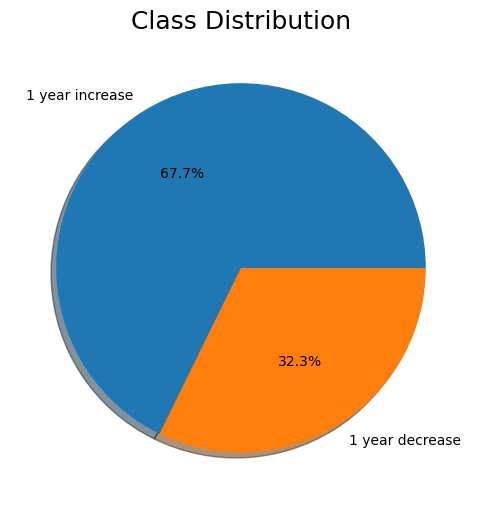

,Adj Close,Volume,Price change 12mo,Price change 8mo,Price change 4mo,Price change,Price change pct,Compound,Negative,Neutral,...,readability,noun_count,verb_count,adj_count,adv_count,pron_count,Price change sign long,Price change sign mid,Price change sign short,word_calculation
count,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.0,248.0,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,188.598811,3.394098e+08,17.623202,6.964820,4.290364,0.0,0.0,0.947066,0.012302,0.759065,...,11.173898,37.737903,17.455645,13.947581,3.899194,9.697581,0.354839,0.225806,0.169355,8.056125
std,284.502164,5.189971e+08,72.128091,74.073769,47.943331,0.0,0.0,0.092223,0.019032,0.060063,...,1.220372,24.992790,9.524635,8.718336,3.584989,5.410411,0.936818,0.976142,0.987548,44.844990
min,13.740000,7.179000e+06,-440.849854,-812.919922,-212.569824,0.0,0.0,-0.077200,0.000000,0.591000,...,6.715007,5.000000,4.000000,1.000000,0.000000,2.000000,-1.000000,-1.000000,-1.000000,0.000089
25%,70.635208,6.225920e+07,-4.581470,-7.209635,-8.710438,0.0,0.0,0.944000,0.000000,0.717000,...,10.486873,22.000000,11.000000,8.000000,2.000000,6.000000,-1.000000,-1.000000,-1.000000,0.304013
50%,122.636677,1.382164e+08,9.799576,4.883839,2.193904,0.0,0.0,0.969350,0.000000,0.757500,...,11.230130,32.000000,16.000000,12.000000,3.000000,8.000000,1.000000,1.000000,1.000000,0.804961
75%,203.677041,3.791968e+08,35.436981,22.120811,16.623924,0.0,0.0,0.986675,0.019000,0.800250,...,11.834281,45.000000,21.000000,17.250000,5.000000,13.000000,1.000000,1.000000,1.000000,2.085691
max,2456.129883,3.158994e+09,454.900024,429.540161,417.220093,0.0,0.0,0.998300,0.121000,0.903000,...,16.789320,185.000000,62.000000,53.000000,21.000000,32.000000,1.000000,1.000000,1.000000,502.672356


In [120]:
ones = len(result[result['Price change sign long']==1])
minus = len(result[result['Price change sign long']==-1])

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[ones, minus], labels=['1 year increase','1 year decrease'], shadow=True, autopct='%1.1f%%')
plt.title('Class Distribution', fontsize=18)
plt.show()

result.describe()

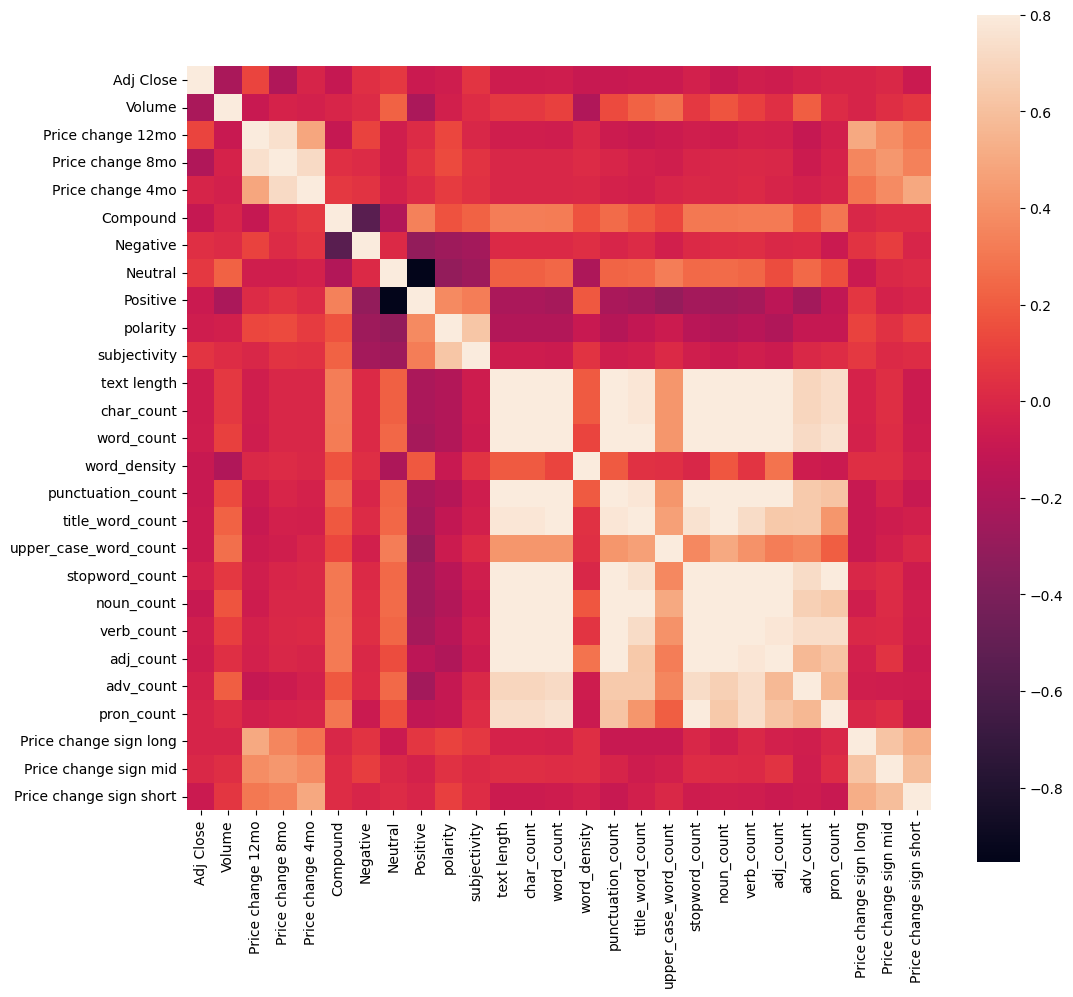

In [18]:
f, ax = plt.subplots(figsize=(12, 11))
sns.heatmap(result.corr(), vmax=.8, square=True);

In [19]:
result = result.drop(columns=['Price change 12mo', 'Price change 8mo', 'Price change 4mo', 'Price change sign mid', 'Price change sign short'])

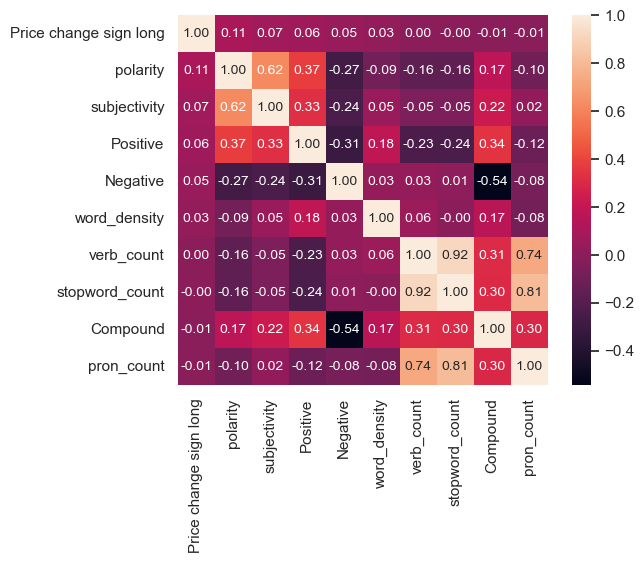

In [20]:
corrmat = result.corr()
k = 10 
cols = corrmat.nlargest(k, 'Price change sign long')['Price change sign long'].index
cm = np.corrcoef(result[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [21]:
corrmat['Price change sign long'].sort_values(ascending=False)

Price change sign long    1.000000
polarity                  0.112370
subjectivity              0.073096
Positive                  0.062566
Negative                  0.046865
word_density              0.028198
verb_count                0.001317
stopword_count           -0.004614
Compound                 -0.006527
pron_count               -0.006699
Adj Close                -0.018493
Volume                   -0.020415
text length              -0.027876
char_count               -0.027876
word_count               -0.030271
adj_count                -0.037865
adv_count                -0.053197
noun_count               -0.054630
Neutral                  -0.080419
upper_case_word_count    -0.092310
title_word_count         -0.092341
punctuation_count        -0.095700
Name: Price change sign long, dtype: float64

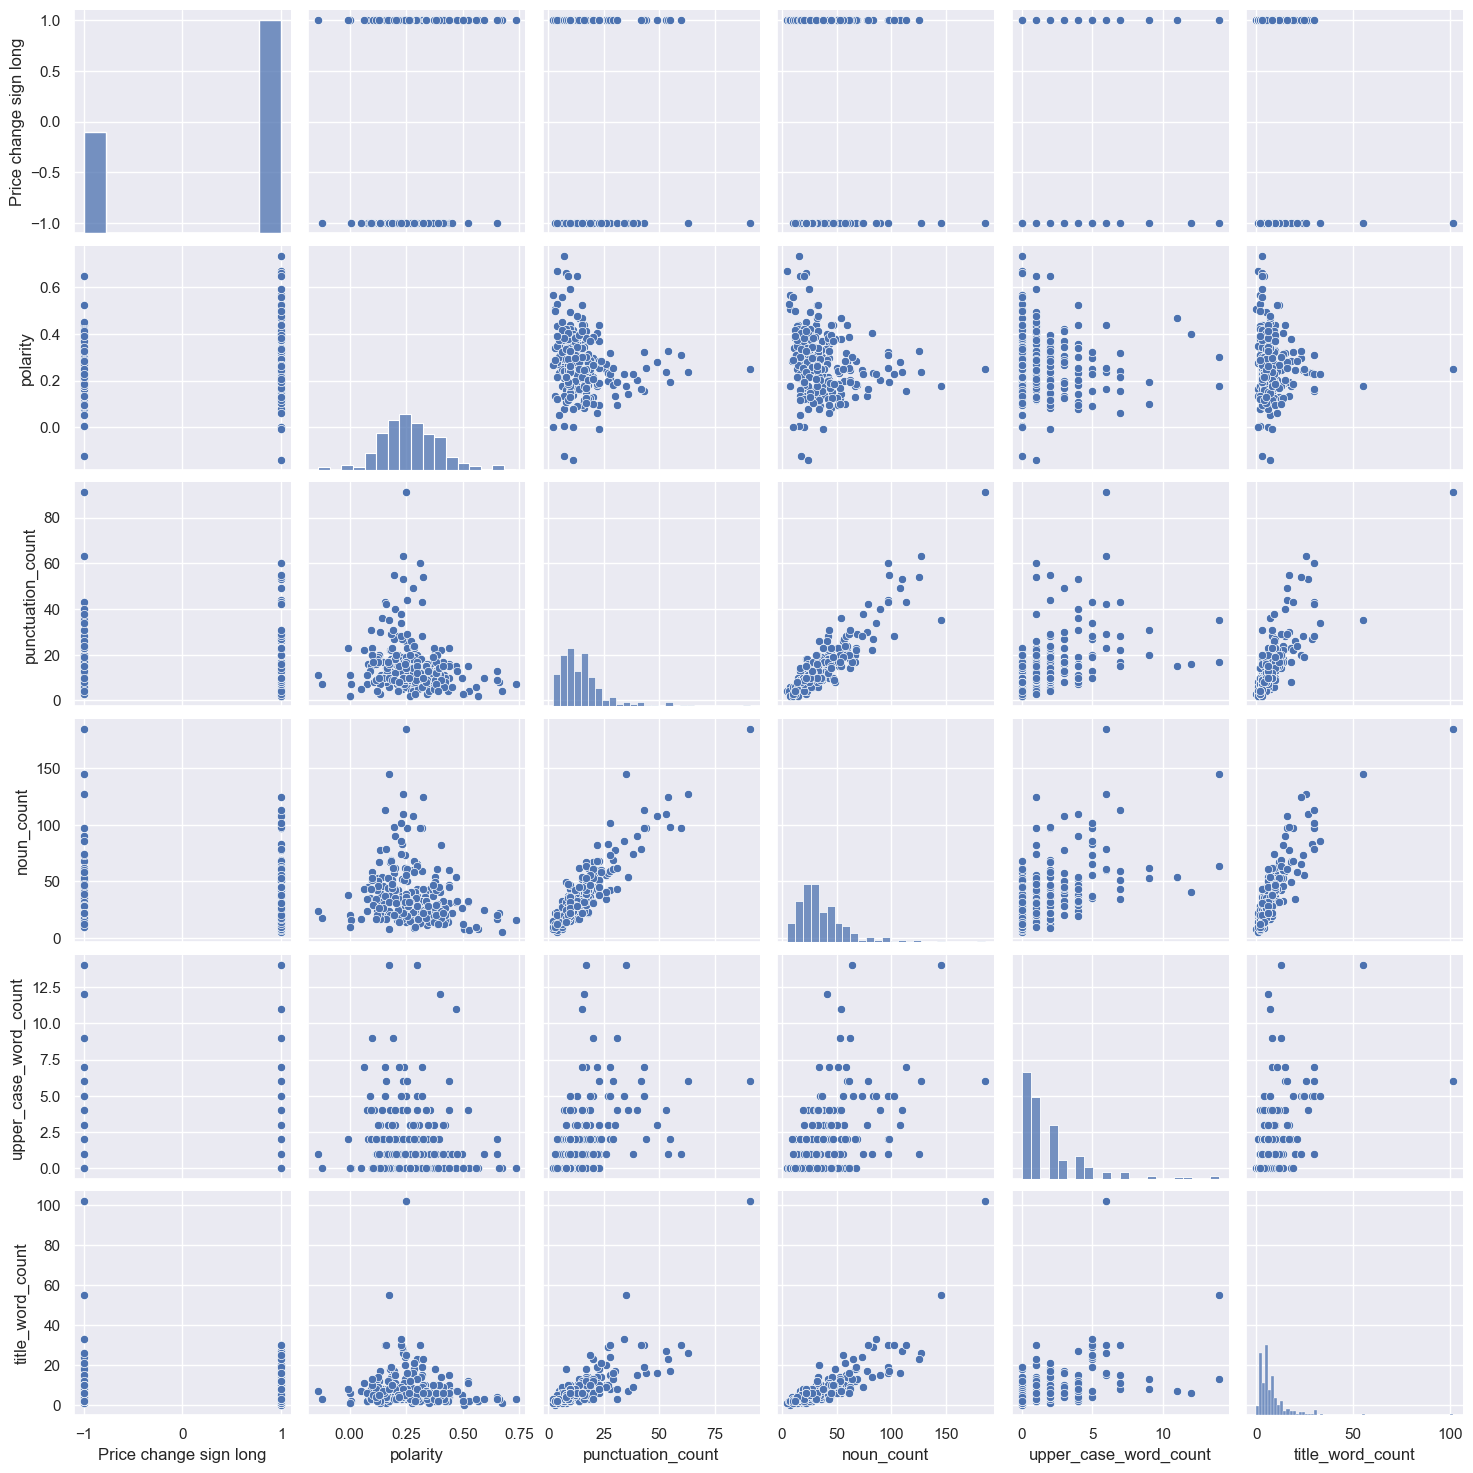

In [22]:
sns.set()
cols = ['Price change sign long', 'polarity', 'punctuation_count', 'noun_count', 'upper_case_word_count', 'title_word_count']
sns.pairplot(result[cols], size = 2.5)
plt.show(); 

# top words for long sign

In [35]:
result.tail(50)

,Company,Date,Adj Close,Volume,press release,Price change 12mo,Price change 8mo,Price change 4mo,Price change,Price change pct,...,readability,noun_count,verb_count,adj_count,adv_count,pron_count,top_words,Price change sign long,Price change sign mid,Price change sign short
51,wallmart,2019-04-01,95.839859,110606900,NaN,NaN,NaN,NaN,4.081665,4.448284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,wallmart,2019-05-01,94.535172,155764900,NaN,NaN,NaN,NaN,2.776978,3.026409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,wallmart,2019-06-01,103.516144,121525000,NaN,NaN,NaN,NaN,11.757950,12.814060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,wallmart,2019-07-01,103.413086,91286900,NaN,NaN,NaN,NaN,11.654892,12.701745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,wallmart,2019-08-01,107.048195,157874200,NaN,NaN,NaN,NaN,15.290001,16.663363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,wallmart,2019-09-01,111.736526,105362500,NaN,NaN,NaN,NaN,19.978332,21.772804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,wallmart,2019-10-01,110.399605,96407600,NaN,NaN,NaN,NaN,18.641411,20.315800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,wallmart,2019-11-01,112.122520,116620600,NaN,NaN,NaN,NaN,20.364326,22.193469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,wallmart,2019-12-01,111.887169,98422700,NaN,NaN,NaN,NaN,20.128975,21.936978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,wallmart,2020-01-01,108.275139,127907500,NaN,NaN,NaN,NaN,16.516945,18.000512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
top_up_words_long = {}
for i in result[result['Price change sign long'] == 1]['top_words']:
    for j in i:
        if j[0] in top_up_words_long:
            top_up_words_long[j[0]] += j[1]
        else:
            top_up_words_long[j[0]] = j[1]
            
top_up_words_long = sorted(top_up_words_long.items(), key=lambda x:x[1], reverse=True)
print(top_up_words_long)

[('year', 189), ('growth', 146), ('strong', 94), ('$', 72), ('quarter', 63), ('customers', 56), ('fiscal', 46), ('record', 45), ('billion', 44), ('revenue', 44), ('performance', 40), ('business', 39), ('2020', 35), ('cash', 34), ('results', 29), ('2018', 27), ('cloud', 24), ('delivered', 23), ('2019', 23), ('fourth', 22), ('Q4', 21), ('continued', 21), ('2017', 20), ('sales', 19), ('2021', 19), ('term', 17), ('Honeywell', 17), ('long', 16), ('flow', 16), ('capital', 16), ('world', 16), ('new', 15), ('earnings', 15), ('Apple', 15), ('company', 15), ('Pfizer', 15), ('customer', 14), ('Affiliates', 14), ('continue', 13), ('said', 13), ('Microsoft', 13), ('product', 12), ('shareholders', 12), ('investments', 12), ('operating', 12), ('demand', 12), ('great', 11), ('AI', 11), ('products', 11), ('financial', 11), ('global', 11), ('pandemic', 11), ('NVIDIA', 11), ('challenging', 10), ('percent', 10), ('free', 10), ('digital', 10), ('services', 9), ('significant', 9), ('Alexa', 9), ('share', 9)

In [38]:
top_down_words_long = {}
for i in result[result['Price change sign long'] == -1]['top_words']:
    for j in i:
        if j[0] in top_down_words_long:
            top_down_words_long[j[0]] += j[1]
        else:
            top_down_words_long[j[0]] = j[1]
            
top_down_words_long = sorted(top_down_words_long.items(), key=lambda x:x[1], reverse=True)

#normalize 116 postive and 27 negative = 168/80 = 2.1
top_down_words_long_new = []
for key, value in top_down_words_long:
    value = value * 2.1
    top_down_words_long_new.append(tuple([key, int(value)])) 

print(top_down_words_long_new)

[('growth', 210), ('year', 201), ('strong', 136), ('quarter', 100), ('$', 65), ('performance', 63), ('business', 63), ('revenue', 50), ('customers', 42), ('fiscal', 35), ('billion', 35), ('2021', 33), ('fourth', 33), ('sales', 33), ('cloud', 33), ('businesses', 29), ('Prime', 29), ('Oracle', 29), ('new', 27), ('delivered', 27), ('percent', 25), ('financial', 25), ('Q4', 25), ('2017', 25), ('2019', 25), ('term', 21), ('U.S.', 21), ('NVIDIA', 21), ('results', 18), ('value', 18), ('Amazon', 18), ('Apple', 18), ('like', 16), ('excellent', 16), ('cash', 16), ('investments', 16), ('outstanding', 14), ('record', 14), ('2018', 14), ('strategy', 14), ('company', 14), ('continue', 14), ('high', 14), ('products', 14), ('MySQL', 14), ('great', 12), ('product', 12), ('million', 12), ('delivering', 12), ('commercial', 12), ('2022', 12), ('making', 12), ('solid', 12), ('Disney+', 12), ('supply', 12), ('AI', 12), ('said', 12), ('NIKE', 12), ('EPS', 10), ('people', 10), ('drive', 10), ('Affiliates', 10

In [39]:
top_down_words_long_dict = {}

for i in top_down_words_long_new:
    if i[0] in top_down_words_long_dict:
        top_down_words_long_dict[i[0]] += i[1]
    else:
        top_down_words_long_dict[i[0]] = i[1]

In [40]:
# difference between list where the number followed by the word is the times it occurs more in POSTIVE 1
difference_list_long = []
for i in top_up_words_long[:25]:
    if i[0] in top_down_words_long_dict:
        difference = i[1] / top_down_words_long_dict[i[0]]
        difference_list_long.append(tuple([i[0], difference]))

In [41]:
difference_list_long

[('year', 0.9402985074626866),
 ('growth', 0.6952380952380952),
 ('strong', 0.6911764705882353),
 ('$', 1.1076923076923078),
 ('quarter', 0.63),
 ('customers', 1.3333333333333333),
 ('fiscal', 1.3142857142857143),
 ('record', 3.2142857142857144),
 ('billion', 1.2571428571428571),
 ('revenue', 0.88),
 ('performance', 0.6349206349206349),
 ('business', 0.6190476190476191),
 ('cash', 2.125),
 ('results', 1.6111111111111112),
 ('2018', 1.9285714285714286),
 ('cloud', 0.7272727272727273),
 ('delivered', 0.8518518518518519),
 ('2019', 0.92),
 ('fourth', 0.6666666666666666),
 ('Q4', 0.84),
 ('continued', 5.25),
 ('2017', 0.8),
 ('sales', 0.5757575757575758),
 ('2021', 0.5757575757575758)]

In [42]:
difference_dict = {}

for i in difference_list_long:
    difference_dict[i[0]] = i[1]

In [43]:
difference_dict

{'year': 0.9402985074626866,
 'growth': 0.6952380952380952,
 'strong': 0.6911764705882353,
 '$': 1.1076923076923078,
 'quarter': 0.63,
 'customers': 1.3333333333333333,
 'fiscal': 1.3142857142857143,
 'record': 3.2142857142857144,
 'billion': 1.2571428571428571,
 'revenue': 0.88,
 'performance': 0.6349206349206349,
 'business': 0.6190476190476191,
 'cash': 2.125,
 'results': 1.6111111111111112,
 '2018': 1.9285714285714286,
 'cloud': 0.7272727272727273,
 'delivered': 0.8518518518518519,
 '2019': 0.92,
 'fourth': 0.6666666666666666,
 'Q4': 0.84,
 'continued': 5.25,
 '2017': 0.8,
 'sales': 0.5757575757575758,
 '2021': 0.5757575757575758}

In [44]:
'year' in difference_list_long

False

In [46]:
result["word_calculation"] = np.nan
for i in range(len(result["press release"])):
    if isinstance(result['press release'].iloc[i], str):
        count = 1
        doc = nlp(result["press release"].iloc[i])
        for word in doc:
            for j in difference_list_long:
                if str(word) == j[0]:
                    count = count * j[1]
        result["word_calculation"].iloc[i] = count


In [47]:
difference_list_long.sort(key=lambda a: a[1])

In [52]:
difference_list_long

[('sales', 0.5757575757575758),
 ('business', 0.6190476190476191),
 ('quarter', 0.63),
 ('performance', 0.6349206349206349),
 ('fourth', 0.6666666666666666),
 ('strong', 0.6911764705882353),
 ('growth', 0.6952380952380952),
 ('cloud', 0.7272727272727273),
 ('delivered', 0.8518518518518519),
 ('revenue', 0.88),
 ('year', 0.9402985074626866),
 ('billion', 1.2571428571428571),
 ('fiscal', 1.3142857142857143),
 ('customers', 1.3333333333333333),
 ('results', 1.6111111111111112),
 ('cash', 2.125),
 ('record', 3.2142857142857144),
 ('continued', 5.25)]

In [54]:
#difference_list_long.remove(('2021', 0.5757575757575758))
#difference_list_long.remove(('2017', 0.8))
#difference_list_long.remove(('Q4', 0.84))
#difference_list_long.remove(('2019', 0.92))
#difference_list_long.remove(('Q4', 21))
#difference_list_long.remove(('$', 1.1076923076923078))
#difference_list_long.remove(('2018', 1.9285714285714286))
#difference_list_long.remove(('2018', 1.9285714285714286))

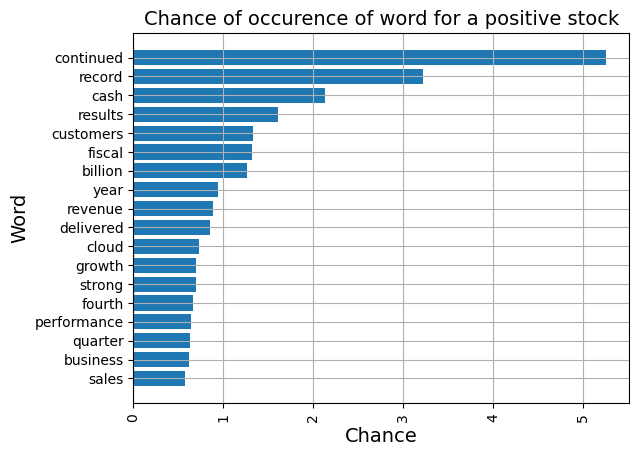

In [74]:
words = []
value = []
for i in difference_list_long:
    words.append(i[0])
    value.append(i[1])

#country = ['A', 'B', 'C', 'D', 'E']
#gdp_per_capita = [45000, 42000, 52000, 49000, 47000]

#colors = ['green', 'blue', 'purple', 'brown', 'teal']
plt.barh(words, value)
plt.title('Chance of occurence of word for a positive stock', fontsize=14)
plt.xlabel('Chance', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

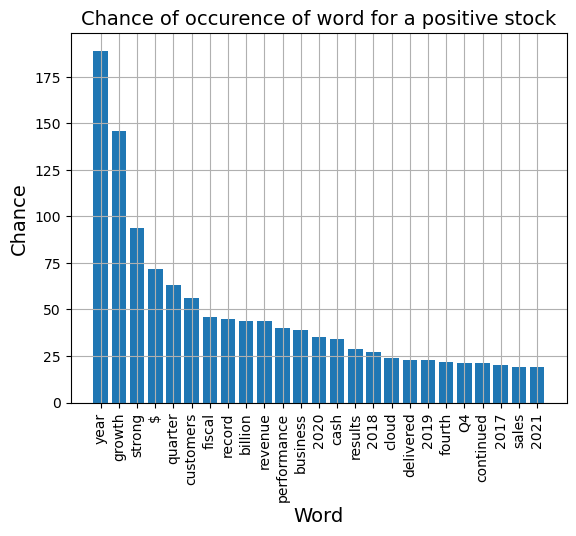

In [63]:
words = []
value = []
for i in top_up_words_long[:25]:
    words.append(i[0])
    value.append(i[1])

#country = ['A', 'B', 'C', 'D', 'E']
#gdp_per_capita = [45000, 42000, 52000, 49000, 47000]

#colors = ['green', 'blue', 'purple', 'brown', 'teal']
plt.bar(words, value)
plt.title('Chance of occurence of word for a positive stock', fontsize=14)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Chance', fontsize=14)
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

In [64]:
words = []
value = []
for i in top_up_words_long[:25]:
    words.append(i[0])
    value.append(i[1])
    

In [42]:
top_up_words_long.remove(('$', 72))
top_up_words_long.remove(('2020', 35))
top_up_words_long.remove(('2018', 27))
top_up_words_long.remove(('2019', 23))
top_up_words_long.remove(('Q4', 21))
top_up_words_long.remove(('fourth', 22))
top_up_words_long.remove(('2017', 20))
top_up_words_long.remove(('2021', 19))

In [65]:
top_up_words_long

[('year', 189),
 ('growth', 146),
 ('strong', 94),
 ('$', 72),
 ('quarter', 63),
 ('customers', 56),
 ('fiscal', 46),
 ('record', 45),
 ('billion', 44),
 ('revenue', 44),
 ('performance', 40),
 ('business', 39),
 ('2020', 35),
 ('cash', 34),
 ('results', 29),
 ('2018', 27),
 ('cloud', 24),
 ('delivered', 23),
 ('2019', 23),
 ('fourth', 22),
 ('Q4', 21),
 ('continued', 21),
 ('2017', 20),
 ('sales', 19),
 ('2021', 19),
 ('term', 17),
 ('Honeywell', 17),
 ('long', 16),
 ('flow', 16),
 ('capital', 16),
 ('world', 16),
 ('new', 15),
 ('earnings', 15),
 ('Apple', 15),
 ('company', 15),
 ('Pfizer', 15),
 ('customer', 14),
 ('Affiliates', 14),
 ('continue', 13),
 ('said', 13),
 ('Microsoft', 13),
 ('product', 12),
 ('shareholders', 12),
 ('investments', 12),
 ('operating', 12),
 ('demand', 12),
 ('great', 11),
 ('AI', 11),
 ('products', 11),
 ('financial', 11),
 ('global', 11),
 ('pandemic', 11),
 ('NVIDIA', 11),
 ('challenging', 10),
 ('percent', 10),
 ('free', 10),
 ('digital', 10),
 ('serv

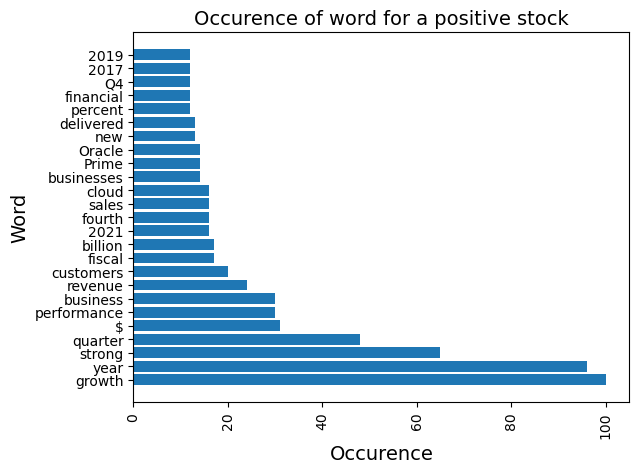

In [71]:
plt.barh(words, value)
plt.title('Occurence of word for a positive stock', fontsize=14)
plt.xlabel('Occurence', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

In [75]:
words = []
value = []
for i in top_down_words_long[:25]:
    words.append(i[0])
    value.append(i[1])
    

In [77]:
top_down_words_long.remove(('$', 31))
top_down_words_long.remove(('2021', 16))
top_down_words_long.remove(('Q4', 12))
top_down_words_long.remove(('2017', 12))
top_down_words_long.remove(('2019', 12))

ValueError: list.remove(x): x not in list

In [78]:
top_down_words_long

[('growth', 100),
 ('year', 96),
 ('strong', 65),
 ('quarter', 48),
 ('performance', 30),
 ('business', 30),
 ('revenue', 24),
 ('customers', 20),
 ('fiscal', 17),
 ('billion', 17),
 ('fourth', 16),
 ('sales', 16),
 ('cloud', 16),
 ('businesses', 14),
 ('Prime', 14),
 ('Oracle', 14),
 ('new', 13),
 ('delivered', 13),
 ('percent', 12),
 ('financial', 12),
 ('term', 10),
 ('U.S.', 10),
 ('NVIDIA', 10),
 ('results', 9),
 ('value', 9),
 ('Amazon', 9),
 ('Apple', 9),
 ('like', 8),
 ('excellent', 8),
 ('cash', 8),
 ('investments', 8),
 ('outstanding', 7),
 ('record', 7),
 ('2018', 7),
 ('strategy', 7),
 ('company', 7),
 ('continue', 7),
 ('high', 7),
 ('products', 7),
 ('MySQL', 7),
 ('great', 6),
 ('product', 6),
 ('million', 6),
 ('delivering', 6),
 ('commercial', 6),
 ('2022', 6),
 ('making', 6),
 ('solid', 6),
 ('Disney+', 6),
 ('supply', 6),
 ('AI', 6),
 ('said', 6),
 ('NIKE', 6),
 ('EPS', 5),
 ('people', 5),
 ('drive', 5),
 ('Affiliates', 5),
 ('long', 5),
 ('momentum', 5),
 ('work', 5

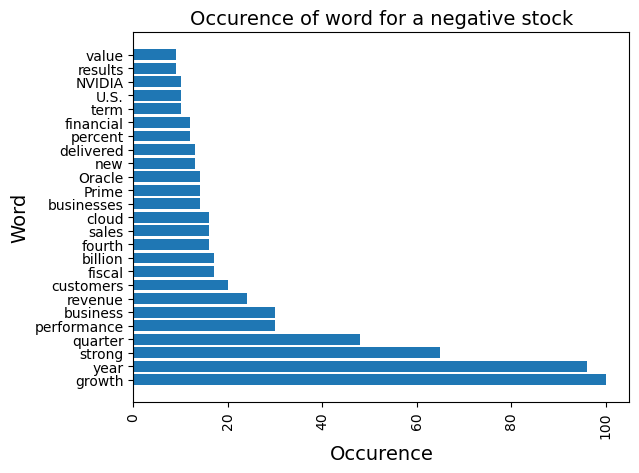

In [80]:
plt.barh(words, value)
plt.title('Occurence of word for a negative stock', fontsize=14)
plt.xlabel('Occurence', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

In [35]:
result

,Date,Adj Close,Volume,press release,Compound,Negative,Neutral,Positive,polarity,subjectivity,...,upper_case_word_count,stopword_count,noun_count,verb_count,adj_count,adv_count,pron_count,top_words,Price change sign long,word_calculation
36,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,0.8882,0.000,0.723,0.277,0.505273,0.704909,...,0,12,8,6,6,5,4,"[(2017, 1), (great, 1), (year, 1), (performed,...",1,1.450746
48,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,0.9217,0.000,0.725,0.275,0.362500,0.731250,...,0,18,14,6,6,2,5,"[(year, 2), (2018, 1), (outstanding, 1), (Abbo...",1,0.627955
60,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,0.8932,0.000,0.592,0.408,0.671667,0.756667,...,0,6,5,6,4,1,2,"[(growth, 2), (focus, 1), (organic, 1), (drivi...",1,1.113614
72,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",0.8103,0.031,0.757,0.212,0.384091,0.638636,...,2,15,12,6,5,0,3,"[(EPS, 2), (growth, 2), (Despite, 1), (challen...",1,0.222914
84,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,0.8360,0.000,0.806,0.194,0.307273,0.579242,...,2,14,12,6,5,1,3,"[(year, 2), (EPS, 2), (2021, 1), (outstanding,...",-1,1.858078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2018-02-01,81.499840,307532700,We have good momentum in the business with sol...,0.9758,0.000,0.676,0.324,0.325000,0.377778,...,2,28,22,14,6,0,8,"[(business, 2), (making, 2), (work, 2), (custo...",-1,0.256427
49,2019-02-01,91.758194,166799500,"We had a good year, and I want to thank our as...",0.9913,0.000,0.635,0.365,0.411970,0.587121,...,1,43,22,22,10,6,14,"[(want, 2), (work, 2), (customers, 2), (delive...",-1,0.462493
61,2020-02-01,101.834824,132414100,We thank our associates for another good year....,0.9945,0.029,0.751,0.220,0.228437,0.476852,...,5,104,86,35,28,9,20,"[(strong, 5), (quarter, 5), (sales, 5), (U.S.,...",-1,0.000344
73,2021-02-01,124.918640,184999800,We completed a strong year and a strong Q4 tha...,0.9887,0.009,0.810,0.182,0.285088,0.561404,...,2,74,58,40,22,17,19,"[(strong, 4), (associates, 3), (customers, 3),...",-1,0.420966


# top words for short sign

In [81]:
#top_up_words_short = {}
#for i in result[result['Price change sign short'] == 1]['top_words']:
#    for j in i:
#        if j[0] in top_up_words_short:
#            top_up_words_short[j[0]] += j[1]
#        else:
#            top_up_words_short[j[0]] = j[1]
#            
#top_up_words_short = sorted(top_up_words_short.items(), key=lambda x:x[1], reverse=True)
#print(top_up_words_short)

In [82]:
#top_down_words_short = {}
#for i in result[result['Price change sign short'] == -1]['top_words']:
#    for j in i:
#        if j[0] in top_down_words_short:
#            top_down_words_short[j[0]] += j[1]
#        else:
#            top_down_words_short[j[0]] = j[1]
#            
#top_down_words_short = sorted(top_down_words_short.items(), key=lambda x:x[1], reverse=True)
#
##normalize 116 postive and 27 negative = 168/80 = 2.1
#top_down_words_short_new = []
#for key, value in top_down_words_short:
#    value = value * 2.1
#    top_down_words_short_new.append(tuple([key, int(value)])) 
#
#print(top_down_words_short_new)

In [83]:
#top_down_words_short_dict = {}
#
#for i in top_down_words_short_new:
#    if i[0] in top_down_words_short_dict:
#        top_down_words_short_dict[i[0]] += i[1]
#    else:
#        top_down_words_short_dict[i[0]] = i[1]

In [84]:
# difference between list where the number followed by the word is the times it occurs more in POSTIVE 1
#difference_list_short = []
#for i in top_up_words_short[:25]:
#    if i[0] in top_down_words_short_dict:
#        difference = i[1] / top_down_words_short_dict[i[0]]
#        difference_list_short.append(tuple([i[0], difference]))

In [85]:
#difference_list_short

In [86]:
#result

In [87]:
data = result

In [88]:
result.dropna(subset=['press release'], inplace=True)

In [90]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [91]:
X = np.array(result[['polarity', 'punctuation_count', 'noun_count', 'upper_case_word_count', 'word_count', 'word_calculation', 
                    'subjectivity']])
y = np.array(result['Price change sign long'])
# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  shuffle=True)

print(f"Train data shapes X:{X_train.shape} , y:{y_train.shape}")
print(f"Test data shapes X:{X_test.shape} , y:{y_test.shape}")

Train data shapes X:(173, 7) , y:(173,)
Test data shapes X:(75, 7) , y:(75,)


In [92]:
result.columns

Index(['Company', 'Date', 'Adj Close', 'Volume', 'press release',
       'Price change 12mo', 'Price change 8mo', 'Price change 4mo',
       'Price change', 'Price change pct', 'Compound', 'Negative', 'Neutral',
       'Positive', 'polarity', 'subjectivity', 'text length', 'word_count',
       'word_density', 'punctuation_count', 'upper_case_word_count',
       'stopword_count', 'readability', 'noun_count', 'verb_count',
       'adj_count', 'adv_count', 'pron_count', 'top_words',
       'Price change sign long', 'Price change sign mid',
       'Price change sign short', 'word_calculation'],
      dtype='object')

In [93]:
from sklearn.metrics import make_scorer,f1_score, accuracy_score,precision_score, recall_score, f1_score
scoring = {'accuracy' : make_scorer(accuracy_score, greater_is_better=True), 
           'f1_macro' : make_scorer(f1_score, average='macro', greater_is_better=True),
           'precision' : make_scorer(precision_score, zero_division=0),
           'recall' : make_scorer(recall_score, average='macro') }

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  newton-cg
Mean accs :  0.6416806722689075
Mean f1_macro 0.48628840970350407
Mean precision 0.6631693276854567
Mean recall 0.5225955204216073


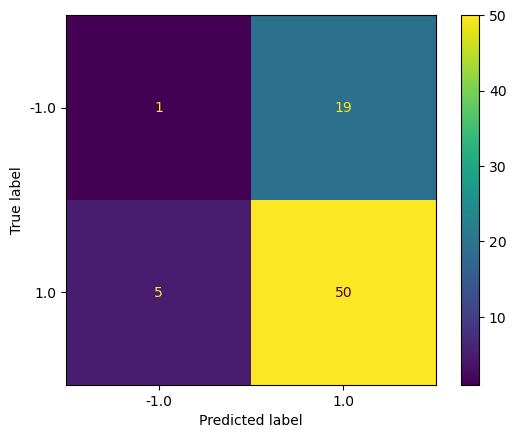

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  lbfgs
Mean accs :  0.6416806722689075
Mean f1_macro 0.48628840970350407
Mean precision 0.6631693276854567
Mean recall 0.5225955204216073


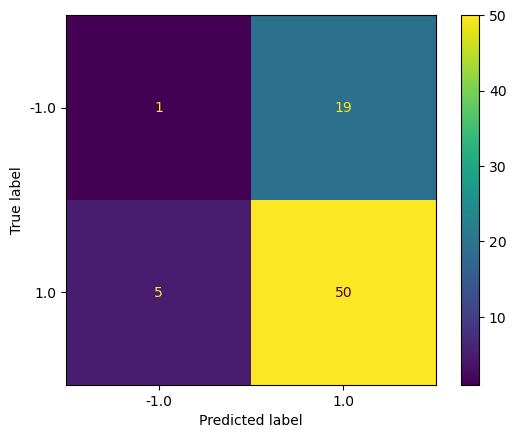

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  liblinear
Mean accs :  0.6416806722689076
Mean f1_macro 0.48161967743326806
Mean precision 0.6639128107818809
Mean recall 0.5225955204216073


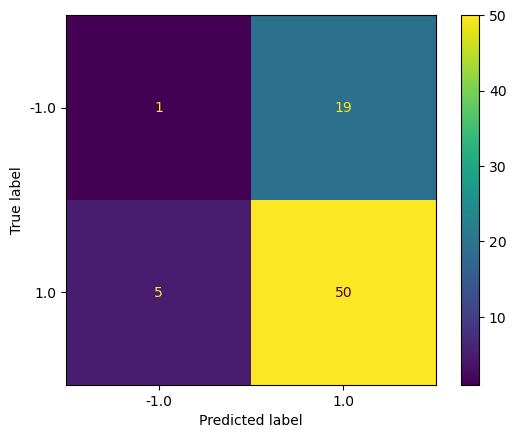

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  sag
Mean accs :  0.6475630252100839
Mean f1_macro 0.4444751799924214
Mean precision 0.6587012987012987
Mean recall 0.5111989459815547


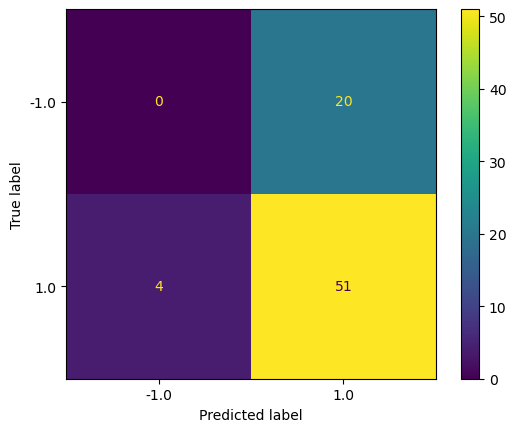

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  saga
Mean accs :  0.6647058823529413
Mean f1_macro 0.44215516687386025
Mean precision 0.662734593837535
Mean recall 0.5204545454545454


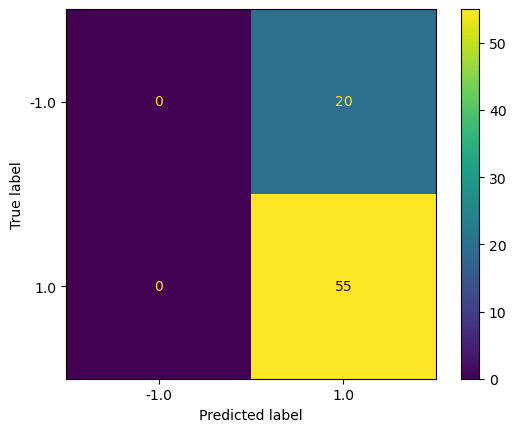

In [94]:
for solver in [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] :
    print("-----------"*10)
    print("Training Logistic Regression with solver ",solver)
    logisticRegr = LogisticRegression(penalty='l2', solver=solver)
    logisticRegr.fit(X_train, y_train)

    # predict model
    # Predict for One Observation
    logisticRegr.predict(X_test[0].reshape(1,-1))

    cv_scores = cross_validate(logisticRegr, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)
    
    predictions = logisticRegr.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logisticRegr.classes_)
    disp.plot()
    plt.show()

In [95]:
logisticRegr = LogisticRegression(penalty='l2', solver='liblinear')
logisticRegr.fit(X_train, y_train)
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("Accuracy on test set : ",score)

Accuracy on test set :  0.68


------------------------------------------------------------------------------------------
Training with k =  2
Mean accs :  0.42789915966386555
Mean f1_macro 0.4229181222900091
Mean precision 0.6075213675213675
Mean recall 0.45602766798418964


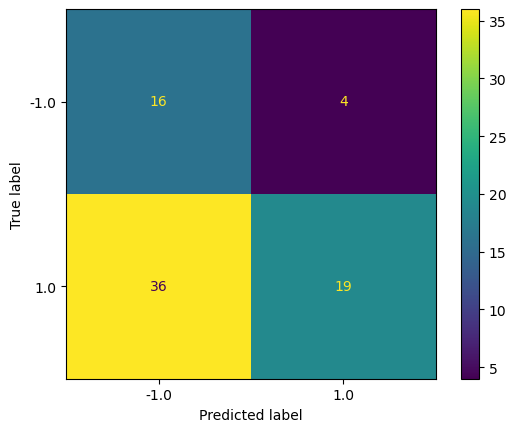

------------------------------------------------------------------------------------------
Training with k =  5
Mean accs :  0.5714285714285714
Mean f1_macro 0.4657649572649573
Mean precision 0.6412712447195206
Mean recall 0.4804018445322793


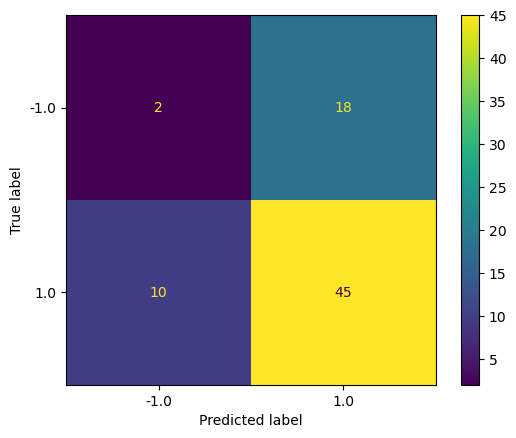

------------------------------------------------------------------------------------------
Training with k =  10
Mean accs :  0.5547899159663865
Mean f1_macro 0.4210485405579745
Mean precision 0.6272667636405121
Mean recall 0.4522068511198946


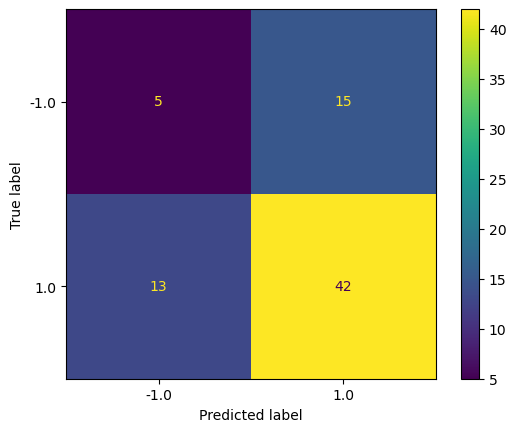

In [96]:
for k in [2, 5 ,10]:
    print("---------"*10)
    print("Training with k = ",k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Cross 5 fold validation
    cv_scores = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)

    # cONFUSION matrix
    predictions = knn.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
    disp.plot()
    plt.show()

In [97]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
# Use score method to get accuracy of model
score = knn.score(X_test, y_test)
print("Accuracy on test set : ",score)

Accuracy on test set :  0.6266666666666667


------------------------------------------------------------------------------------------
Training SVM with kernel  poly
Mean accs :  0.635798319327731
Mean f1_macro 0.38863137467493186
Mean precision 0.6469365928189458
Mean recall 0.48675889328063243


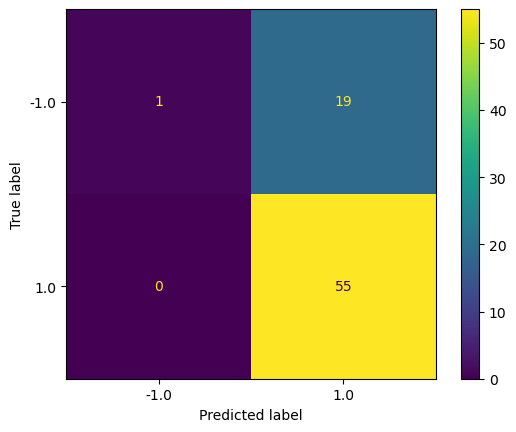

------------------------------------------------------------------------------------------
Training SVM with kernel  linear
Mean accs :  0.6300840336134453
Mean f1_macro 0.39701857368013743
Mean precision 0.646208301502419
Mean recall 0.48639657444005274


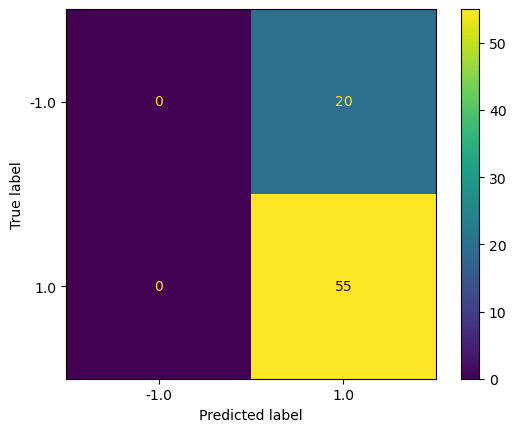

------------------------------------------------------------------------------------------
Training SVM with kernel  rbf
Mean accs :  0.653109243697479
Mean f1_macro 0.39507389162561574
Mean precision 0.653109243697479
Mean recall 0.5


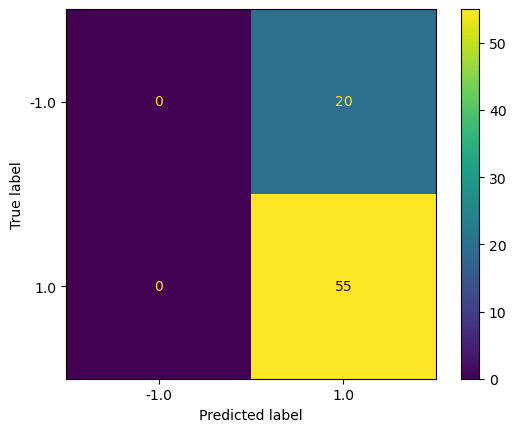

------------------------------------------------------------------------------------------
Training SVM with kernel  sigmoid
Mean accs :  0.5951260504201681
Mean f1_macro 0.49218772421249196
Mean precision 0.6576544145509662
Mean recall 0.5067523056653491


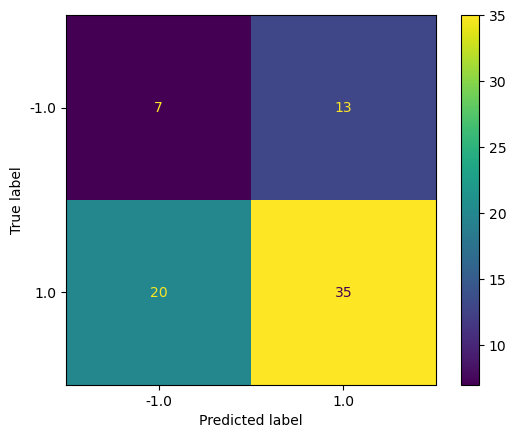

In [98]:
for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
    print("---------"*10)
    print("Training SVM with kernel ", kernel)
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    
     # Cross 5 fold validation
    cv_scores = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)

    # cONFUSION matrix
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [99]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
clf.predict(X_test)
print(f'Kernel: rbf, score: {clf.score(X_test, y_test)}')

Kernel: rbf, score: 0.7333333333333333


------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 2
Mean accs :  0.6732244897959184
Mean f1_macro 0.4330732148800185
Mean precision 0.6805343030829354
Mean recall 0.5068070409982175


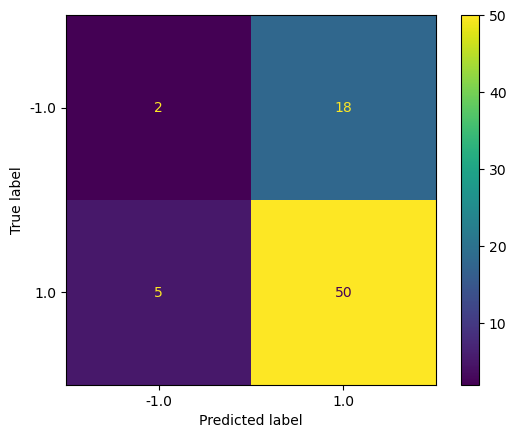

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 3
Mean accs :  0.6732244897959184
Mean f1_macro 0.4330732148800185
Mean precision 0.6805343030829354
Mean recall 0.5068070409982175


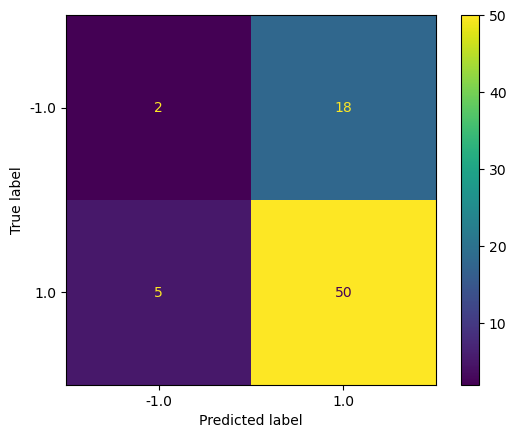

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 5
Mean accs :  0.6242448979591837
Mean f1_macro 0.4389348825259816
Mean precision 0.6667033096926713
Mean recall 0.48332219251336905


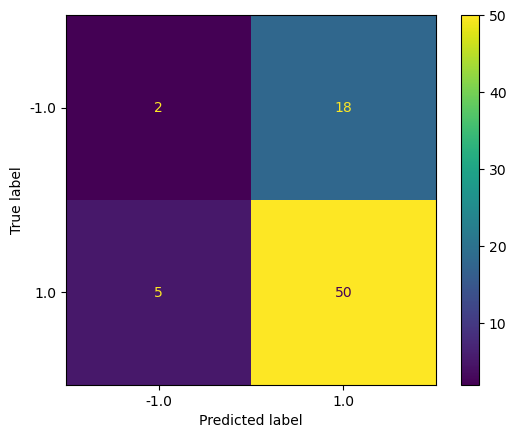

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 10
Mean accs :  0.6164081632653062
Mean f1_macro 0.45476924429465715
Mean precision 0.6693598555423454
Mean recall 0.48736631016042786


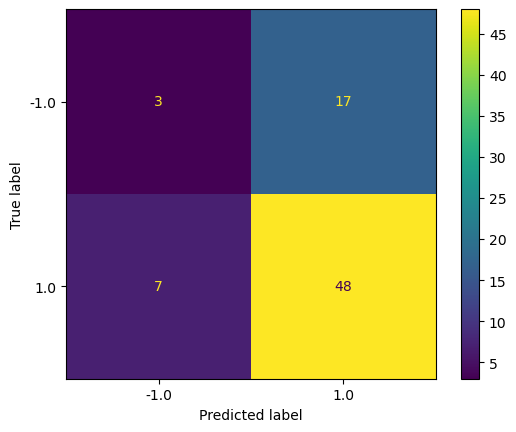

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 2
Mean accs :  0.6732244897959184
Mean f1_macro 0.4330732148800185
Mean precision 0.6805343030829354
Mean recall 0.5068070409982175


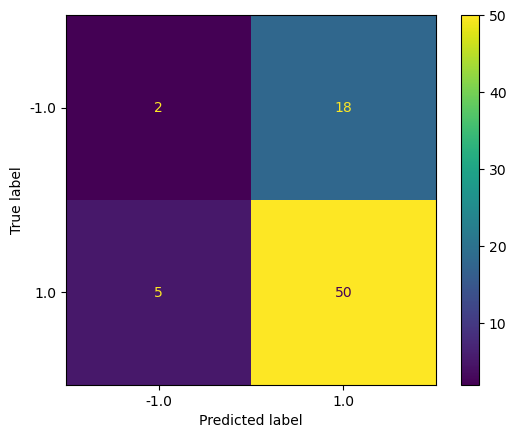

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 3
Mean accs :  0.6853877551020409
Mean f1_macro 0.47577189534185677
Mean precision 0.6935907029478459
Mean recall 0.532174688057041


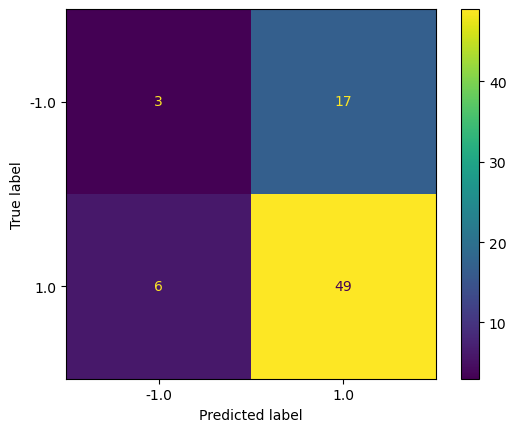

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 5
Mean accs :  0.640408163265306
Mean f1_macro 0.4867331873204678
Mean precision 0.68340130468014
Mean recall 0.5149398395721925


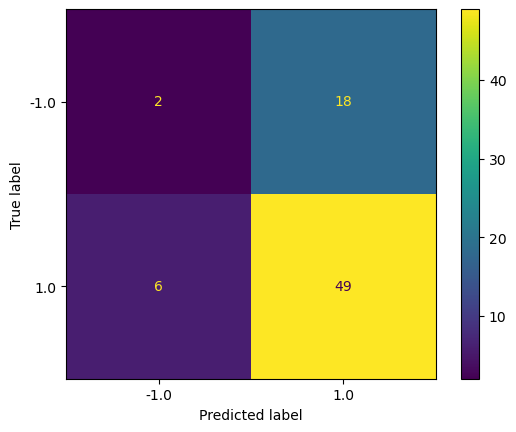

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 10
Mean accs :  0.6283265306122449
Mean f1_macro 0.5395865719009348
Mean precision 0.707791739223372
Mean recall 0.5487745098039215


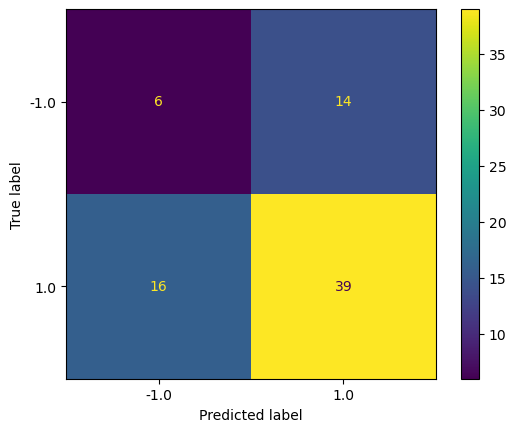

In [100]:
for criterion in ['entropy', 'gini'] :
   # print("---------"*10)
   # print("Training Random Forest with criterion ", criterion)
    
    
    for leafs in [2, 3, 5, 10] :
        print("---------"*10)
        print("Training Random Forest with criterion ", criterion, ",  nodes =",leafs)

        rf = DecisionTreeClassifier(criterion=criterion, max_leaf_nodes=leafs)
        rf.fit(X_train, y_train)

         # Cross 5 fold validation
        cv_scores = cross_validate(rf, X, y, cv=5, scoring=scoring)
        accs = cv_scores['test_accuracy'].mean()
        print("Mean accs : ",accs)
        f1_macros = cv_scores['test_f1_macro'].mean()
        print("Mean f1_macro", f1_macros)
        prec = cv_scores['test_precision'].mean()
        print("Mean precision", prec)
        recall = cv_scores['test_recall'].mean()
        print("Mean recall", recall)

        # cONFUSION matrix
        predictions = rf.predict(X_test)
        cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=rf.classes_)
        disp.plot()
        plt.show()

Accuracy on Test set for 'optimal' random forest is : 0.6933333333333334


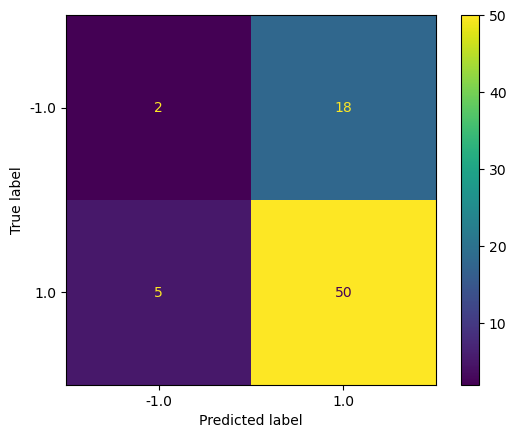

In [101]:
rf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print("Accuracy on Test set for 'optimal' random forest is :", score)
# CONFUSION matrix
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=rf.classes_)
disp.plot()
plt.show()

In [102]:
rf.feature_importances_

array([0.        , 0.38099178, 0.        , 0.        , 0.        ,
       0.61900822, 0.        ])

In [89]:
data.to_csv('result dataset.csv')

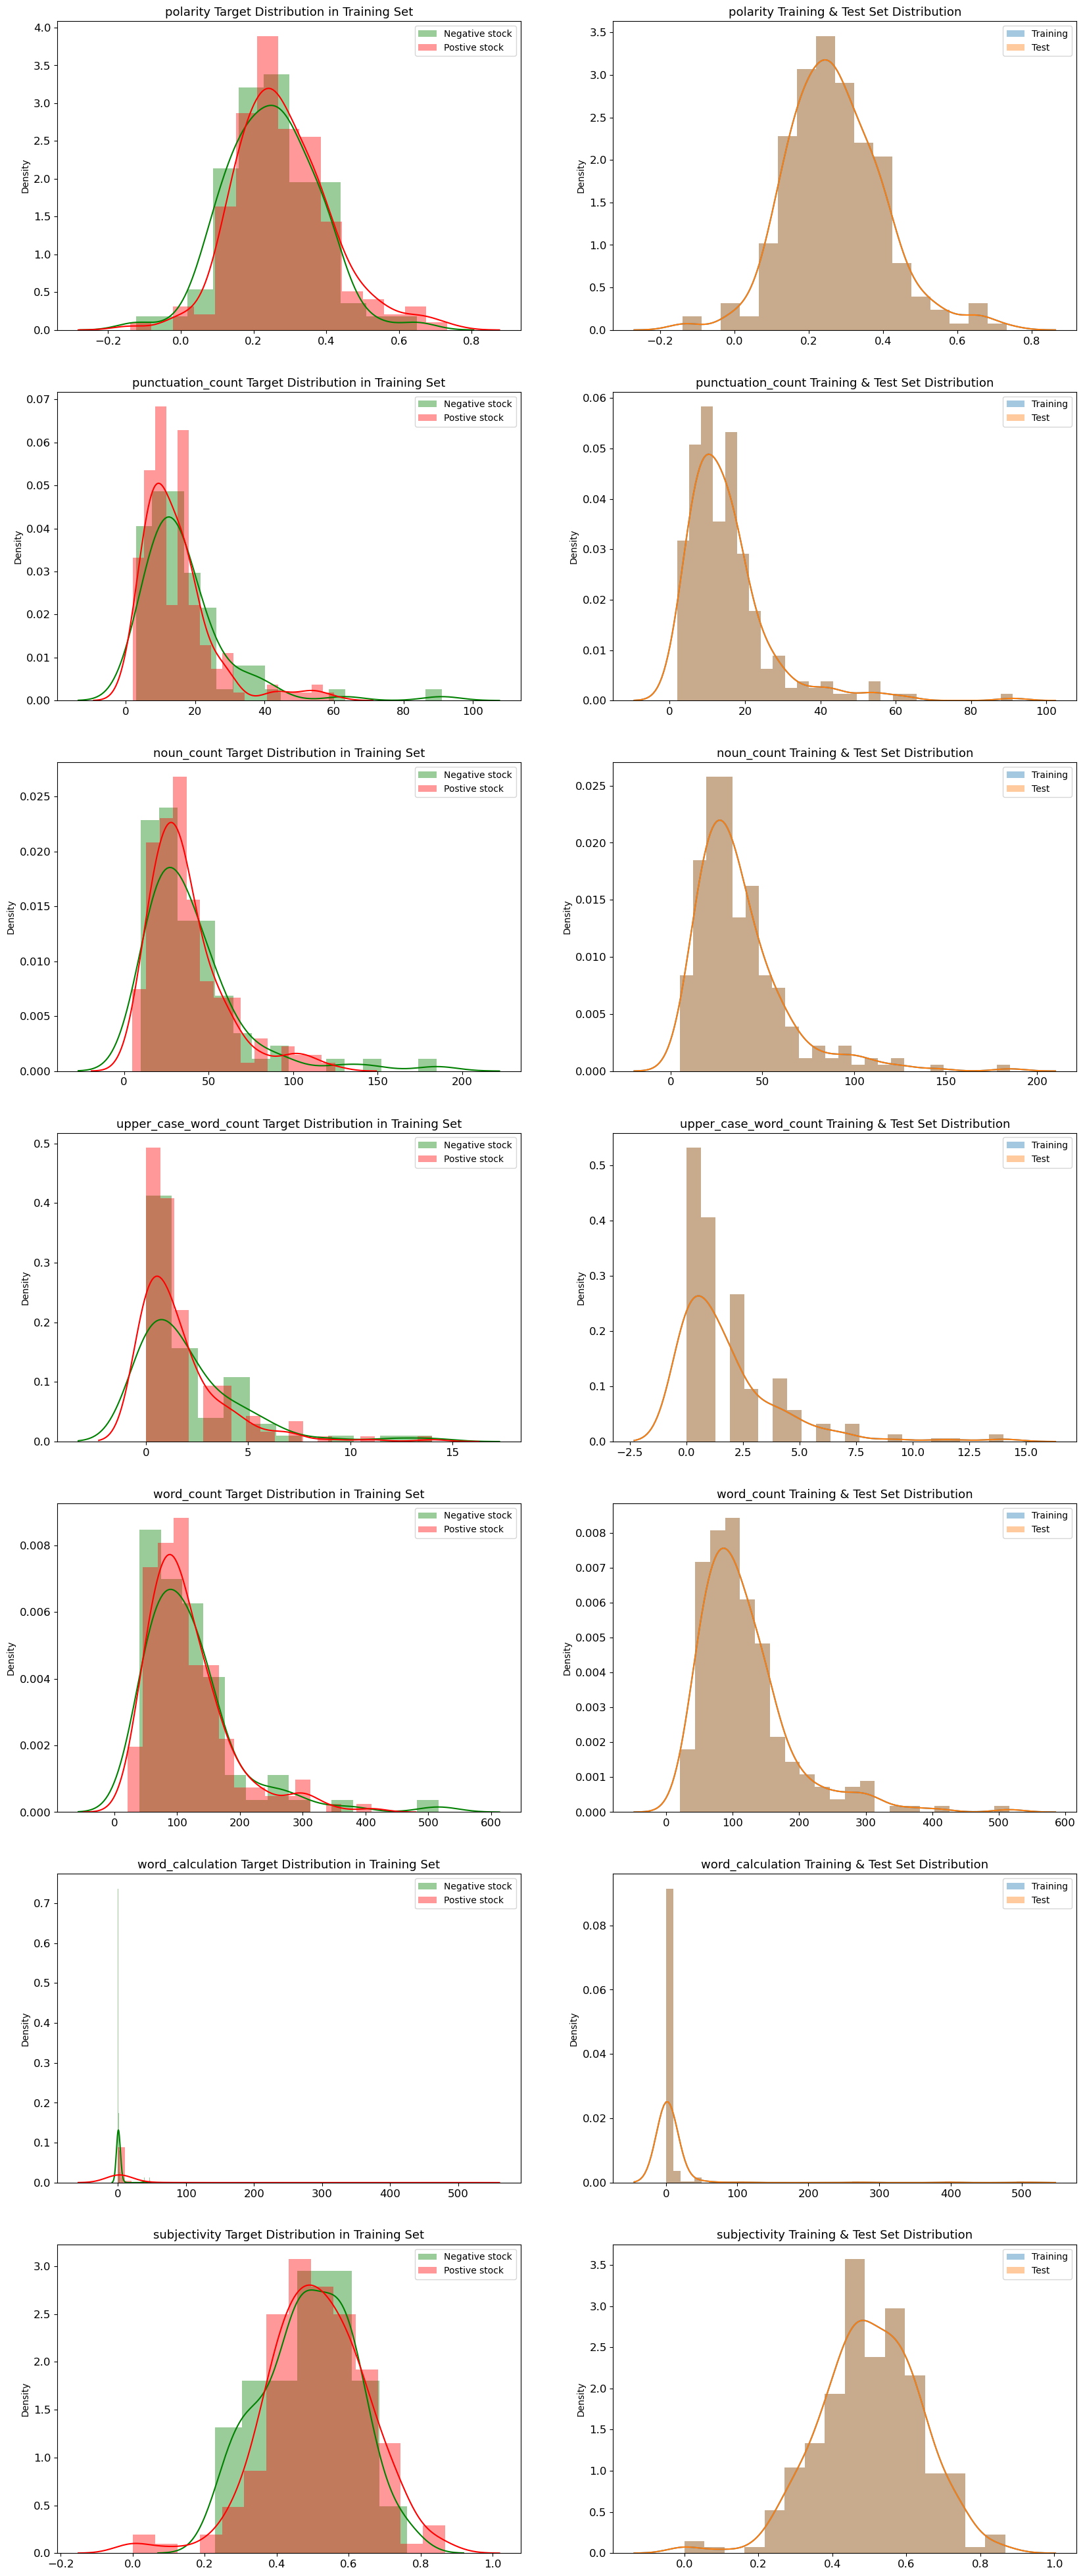

In [103]:
METAFEATURES = ['polarity', 'punctuation_count', 'noun_count', 'upper_case_word_count', 'word_count', 'word_calculation', 
                    'subjectivity']
DISASTER_TWEETS = result['Price change sign long'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(result.loc[~DISASTER_TWEETS][feature], label='Negative stock', ax=axes[i][0], color='green')
    sns.distplot(result.loc[DISASTER_TWEETS][feature], label='Postive stock', ax=axes[i][0], color='red')

    sns.distplot(result[feature], label='Training', ax=axes[i][1])
    sns.distplot(result[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


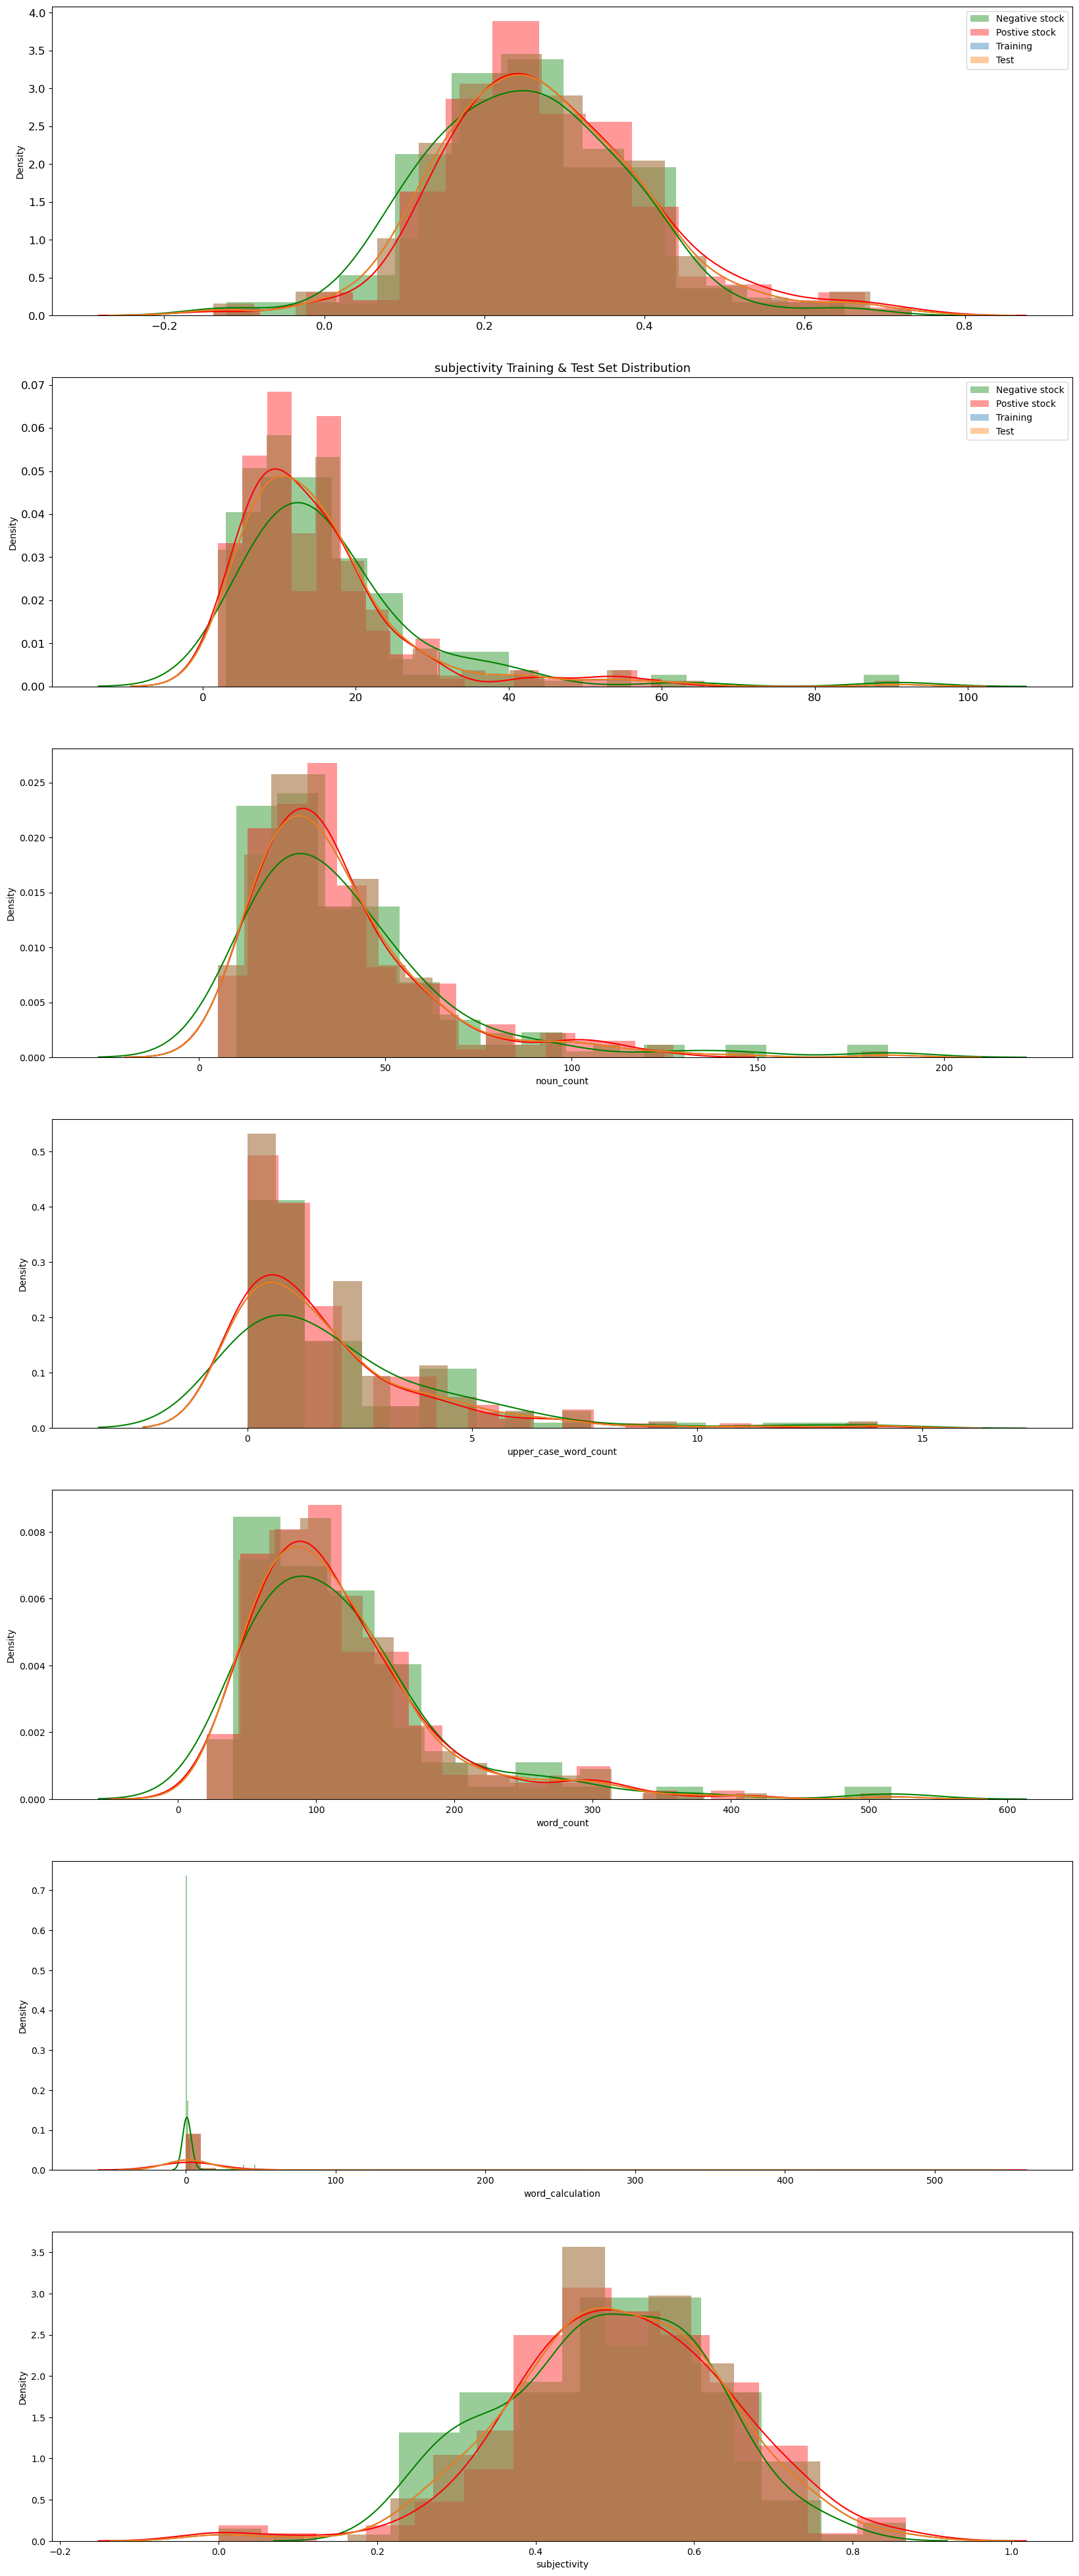

In [104]:
METAFEATURES = ['polarity', 'punctuation_count', 'noun_count', 'upper_case_word_count', 'word_count', 'word_calculation', 
                    'subjectivity']
DISASTER_TWEETS = result['Price change sign long'] == 1

fig, axes = plt.subplots(ncols=1, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(result.loc[~DISASTER_TWEETS][feature], label='Negative stock', ax=axes[i], color='green')
    sns.distplot(result.loc[DISASTER_TWEETS][feature], label='Postive stock', ax=axes[i], color='red')

    sns.distplot(result[feature], label='Training', ax=axes[i])
    sns.distplot(result[feature], label='Test', ax=axes[i])
    
    for j in range(2):
        axes[j].set_xlabel('')
        axes[j].tick_params(axis='x', labelsize=12)
        axes[j].tick_params(axis='y', labelsize=12)
        axes[j].legend()
    
    axes[j].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[j].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

In [85]:
result.head()

,Date,Adj Close,Volume,press release,Compound,Negative,Neutral,Positive,polarity,subjectivity,...,upper_case_word_count,stopword_count,noun_count,verb_count,adj_count,adv_count,pron_count,top_words,Price change sign long,word_calculation
36,2018-01-01,56.711449,156001900,2017 was a great year for us — we performed we...,0.8882,0.000,0.723,0.277,0.505273,0.704909,...,0,12,8,6,6,5,4,"[(2017, 1), (great, 1), (year, 1), (performed,...",1,1.450746
48,2019-01-01,67.803299,157850300,2018 was another outstanding year for Abbott. ...,0.9217,0.000,0.725,0.275,0.362500,0.731250,...,0,18,14,6,6,2,5,"[(year, 2), (2018, 1), (outstanding, 1), (Abbo...",1,0.627955
60,2020-01-01,82.301605,119657000,Our focus on organic growth is driving top-tie...,0.8932,0.000,0.592,0.408,0.671667,0.756667,...,0,6,5,6,4,1,2,"[(growth, 2), (focus, 1), (organic, 1), (drivi...",1,1.113614
72,2021-01-01,118.568031,108930500,"Despite challenging conditions, we achieved do...",0.8103,0.031,0.757,0.212,0.384091,0.638636,...,2,15,12,6,5,0,3,"[(EPS, 2), (growth, 2), (Despite, 1), (challen...",1,0.222914
84,2022-01-01,124.170898,155539600,2021 was an outstanding year for Abbott. We ac...,0.8360,0.000,0.806,0.194,0.307273,0.579242,...,2,14,12,6,5,1,3,"[(year, 2), (EPS, 2), (2021, 1), (outstanding,...",-1,1.858078


In [1]:
result.columns

NameError: name 'result' is not defined

In [111]:
result['word_calculation']

36    1.450746
48    0.627955
60    1.113614
72    0.222914
84    1.858078
        ...   
37    0.256427
49    0.462493
61    0.000344
73    0.420966
85    0.108451
Name: word_calculation, Length: 248, dtype: float64

In [116]:
len(result)

248

In [119]:
len(result[result["Price change sign long"] == -1])

80